In [11]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from datetime import datetime,timedelta
from netCDF4 import Dataset
import cmocean as cm
import matplotlib

In [5]:



def dropnan(arr):
    ocm_data=[]
    for i in arr:
        if(i != -1e+34):
            ocm_data.append(i)
    ocm_data=np.asarray(ocm_data)
    return ocm_data

def dropnan2(arr):
    ocm_data=[]
    for i in arr:
        if(str(i)!='nan'):
            ocm_data.append(i)
    ocm_data=np.asarray(ocm_data)
    return ocm_data



def reshape(arr):
    data=np.asarray(arr.reshape(481*481))
    return data

def rmse(arr):
    day=[]
    for i in range(len(arr)):
        dd=reshape(arr[i,:,:])
        dd=dropnan(dd)
        rmse=np.sqrt(np.sum(dd*dd)/len(dd))
        day.append(rmse)
    return day

In [6]:
data=Dataset("./data.nc")

t=data.variables['MT2'][:].data
t=[int(i) for i in t]
ocm2=data.variables['OCM2'][:]
rtofs=data.variables['RTOFS'][:]

In [7]:
time_star=datetime(int(2019),int(1),int(1))
time_end=datetime(int(2019),int(11),int(1))
time=[]
for i in range(int(time_star.strftime('%j')),int(time_end.strftime('%j'))):
    time.append(time_star)
    time_star=time_star+timedelta(days=1)

In [8]:
t1=int(datetime(int(2019),int(1),int(1)).strftime('%j'))
t2=int(datetime(int(2019),int(2),int(1)).strftime('%j'))
t3=int(datetime(int(2019),int(3),int(1)).strftime('%j'))
t4=int(datetime(int(2019),int(4),int(1)).strftime('%j'))
t5=int(datetime(int(2019),int(5),int(1)).strftime('%j'))
t6=int(datetime(int(2019),int(6),int(1)).strftime('%j'))
t7=int(datetime(int(2019),int(7),int(1)).strftime('%j'))
t8=int(datetime(int(2019),int(8),int(1)).strftime('%j'))
t9=int(datetime(int(2019),int(9),int(1)).strftime('%j'))
t10=int(datetime(int(2019),int(10),int(1)).strftime('%j'))


In [9]:
day_ocm=rmse(ocm2)

day_rtofs=rmse(rtofs)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


In [12]:
myfont = matplotlib.font_manager.FontProperties(fname=r'msyhl.ttc')

In [13]:

box1=[dropnan2(day_ocm[t.index(t1):t.index(t2)]),dropnan2(day_ocm[t.index(t2):t.index(59)]),\
     dropnan2(day_ocm[t.index(59):t.index(t4)]),dropnan2(day_ocm[t.index(t4):t.index(t5)])]
#box=[dropnan2(day_ocm[t.index(t1):t.index(t2)]),day_ocm[t.index(t2):t.index(t3)],\
#     day_ocm[t.index(t3):t.index(t4)],day_ocm[t.index(t4):t.index(t5)],\
#     day_ocm[t.index(t5):t.index(t6)],day_ocm[t.index(t6):t.index(t7)],\
#     dropnan2(day_ocm[t.index(t7):t.index(t8)]),dropnan2(day_ocm[t.index(t8):t.index(t9)]),\
#     dropnan2(day_ocm[t.index(t9):t.index(t10)]),dropnan2(day_ocm[t.index(t10):])]



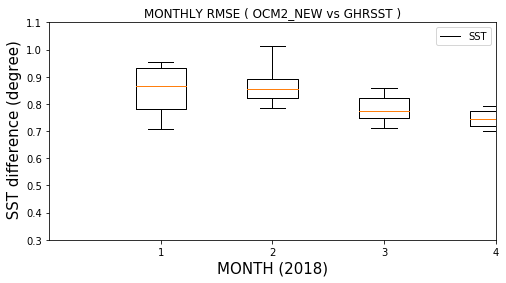

In [14]:
fig = plt.figure(figsize=(8, 4))
plt.boxplot(box1, whis=[5, 95], sym='' )
plt.xlabel('MONTH (2018)',  size=15)
plt.ylabel(' SST difference (degree)', size=15)
plt.title('MONTHLY RMSE ( OCM2_NEW vs GHRSST )')
plt.legend(['SST'], loc='upper right')
plt.axis([0, 4, 0.3,1.1])
fig.savefig('rmse_ocm_box.png')

In [15]:
box2=[dropnan2(day_rtofs[t.index(t1):t.index(t2)]),dropnan2(day_rtofs[t.index(t2):t.index(59)]),\
     dropnan2(day_rtofs[t.index(59):t.index(t4)]),dropnan2(day_rtofs[t.index(t4):t.index(t5)])]


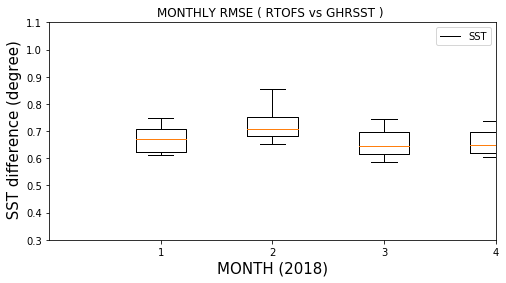

In [16]:
fig = plt.figure(figsize=(8, 4))
plt.boxplot(box2, whis=[5, 95], sym='' )
plt.xlabel('MONTH (2018)',  size=15)
plt.ylabel(' SST difference (degree)',  size=15)
plt.title('MONTHLY RMSE ( RTOFS vs GHRSST ) ')
plt.legend(['SST'], loc='upper right')
plt.axis([0, 4, 0.3,1.1])
fig.savefig('rmse_rtofs_box.png')

In [17]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    

In [18]:
ticks=np.array(range(len(box1)))+1
x_ocm=(np.array(range(len(box1)))+1)*2-0.3
x_rtf=(np.array(range(len(box1)))+1)*2+0.3
x_tit=(np.array(range(len(box1)))+1)*2

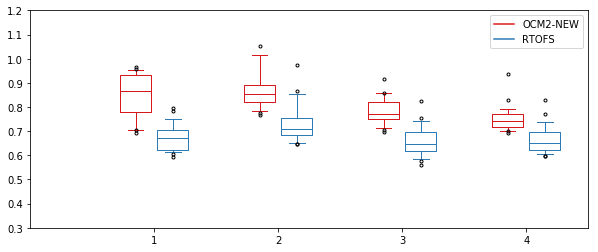

In [19]:
fig = plt.figure(figsize=(10, 4))
boc =plt.boxplot(box1, positions=x_ocm,whis=[5, 95], sym='.' , widths=0.5)
brt =plt.boxplot(box2, positions=x_rtf,whis=[5, 95], sym='.', widths=0.5 )
set_box_color(boc, '#D7191C')
set_box_color(brt, '#2C7BB6')
plt.axis([0, 9, 0.3,1.2])
plt.xticks(x_tit, ticks)
plt.plot([], c='#D7191C', label='OCM2-NEW')
plt.plot([], c='#2C7BB6', label='RTOFS')
plt.legend()

fig.savefig('rmse_all.png')